# NB03: Data Visualisation

In [24]:
import requests
from dotenv import load_dotenv
from functions import *
from bs4 import BeautifulSoup
from pprint import pprint
from auth import *
import base64
import os
import pandas as pd
import json
import csv
import string
import lyricsgenius
import sqlite3
from sqlalchemy import create_engine
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
#! pip install nltk
import nltk
from nltk.corpus import stopwords
import seaborn as sns
#! pip install wordcloud
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
engine = create_engine('sqlite:///../data/spotify_data.db')

# Query to load the top_tracks table from the SQLite database
query = "SELECT lyrics, gender FROM top_tracks"

# Load data into pandas DataFrame
df = pd.read_sql(query, engine)

# Check the first few rows of the DataFrame
print(df.head())

                                              lyrics  gender
0  166 ContributorsTranslationsTürkçeEspañolPortu...       0
1  116 Lyrics[Verse 1]\nYoungblood thinks there's...       0
2  223 Lyrics[Verse 1]\nFor all the times that yo...       0
3  202 Lyrics[Written by Julia Michaels, Justin T...       0
4  134 Lyrics[Intro: Nicki Minaj]\nYeah\nYoung Mo...       0


In [3]:
df['cleaned_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

In [4]:
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

In [5]:
# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words(male_artists_df)
female_word_freq = get_most_frequent_words(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('yeah', np.int64(238)), ('like', np.int64(236)), ('baby', np.int64(207)), ('know', np.int64(201)), ('oh', np.int64(196)), ('just', np.int64(137)), ('love', np.int64(126)), ('got', np.int64(119)), ('chorus', np.int64(114)), ('don', np.int64(102)), ('ll', np.int64(94)), ('night', np.int64(94)), ('wanna', np.int64(89)), ('cash', np.int64(87)), ('cause', np.int64(80)), ('let', np.int64(78)), ('right', np.int64(77)), ('verse', np.int64(69)), ('say', np.int64(63))]
Most frequent words for female artists: [('like', np.int64(249)), ('oh', np.int64(186)), ('yeah', np.int64(170)), ('baby', np.int64(161)), ('know', np.int64(155)), ('don', np.int64(150)), ('just', np.int64(144)), ('love', np.int64(144)), ('chorus', np.int64(131)), ('ll', np.int64(114)), ('got', np.int64(103)), ('come', np.int64(97)), ('want', np.int64(97)), ('cause', np.int64(96)), ('boom', np.int64(92)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('la', np.int6

In [6]:
# Assuming your DataFrame 'df' contains the lyrics and 'gender' column
# Filter the DataFrame for male (gender = 0) and female (gender = 1) artists
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words(male_artists_df)
female_word_freq = get_most_frequent_words(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('yeah', np.int64(238)), ('like', np.int64(236)), ('baby', np.int64(207)), ('know', np.int64(201)), ('oh', np.int64(196)), ('just', np.int64(137)), ('love', np.int64(126)), ('got', np.int64(119)), ('chorus', np.int64(114)), ('don', np.int64(102)), ('ll', np.int64(94)), ('night', np.int64(94)), ('wanna', np.int64(89)), ('cash', np.int64(87)), ('cause', np.int64(80)), ('let', np.int64(78)), ('right', np.int64(77)), ('verse', np.int64(69)), ('say', np.int64(63))]
Most frequent words for female artists: [('like', np.int64(249)), ('oh', np.int64(186)), ('yeah', np.int64(170)), ('baby', np.int64(161)), ('know', np.int64(155)), ('don', np.int64(150)), ('just', np.int64(144)), ('love', np.int64(144)), ('chorus', np.int64(131)), ('ll', np.int64(114)), ('got', np.int64(103)), ('come', np.int64(97)), ('want', np.int64(97)), ('cause', np.int64(96)), ('boom', np.int64(92)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('la', np.int6

In [7]:
# Assuming 'df' is your main dataframe containing the 'gender' and 'lyrics' columns
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words_final(male_artists_df)
female_word_freq = get_most_frequent_words_final(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('baby', np.int64(207)), ('know', np.int64(201)), ('love', np.int64(126)), ('night', np.int64(94)), ('cash', np.int64(87)), ('let', np.int64(78)), ('right', np.int64(77)), ('hey', np.int64(63)), ('say', np.int64(63)), ('dance', np.int64(62)), ('happy', np.int64(60)), ('lose', np.int64(57)), ('make', np.int64(53)), ('girl', np.int64(52)), ('feel', np.int64(51)), ('time', np.int64(50)), ('good', np.int64(46)), ('pour', np.int64(46)), ('way', np.int64(45))]
Most frequent words for female artists: [('baby', np.int64(161)), ('know', np.int64(155)), ('love', np.int64(144)), ('come', np.int64(97)), ('want', np.int64(97)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('tell', np.int64(68)), ('time', np.int64(64)), ('boy', np.int64(54)), ('way', np.int64(50)), ('fuck', np.int64(49)), ('make', np.int64(48)), ('music', np.int64(48)), ('somethin', np.int64(46)), ('bass', np.int64(44)), ('away', np.int64(43)), ('womanizer', np.int64

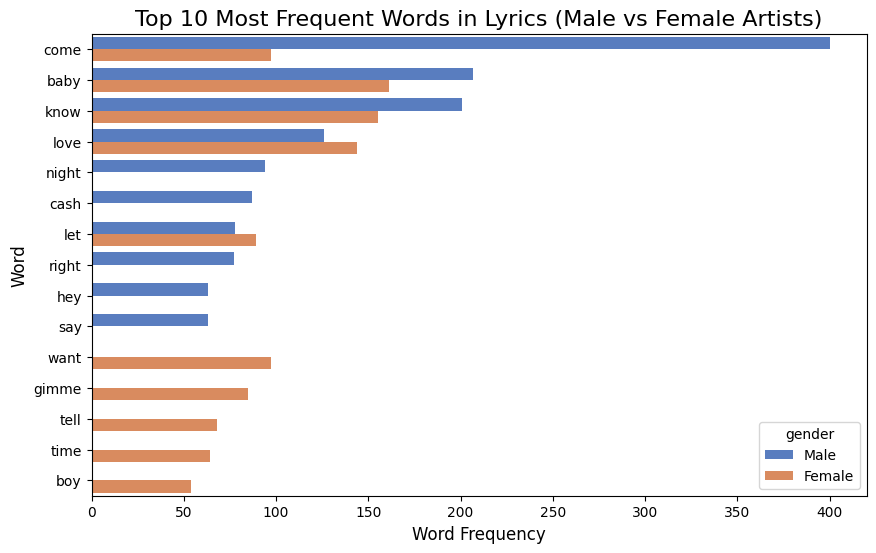

In [23]:
def plot_word_frequencies(male_word_freq, female_word_freq, top_n=10):
    # Extract the top N most frequent words
    male_words, male_counts = zip(*male_word_freq[:top_n])
    female_words, female_counts = zip(*female_word_freq[:top_n])

    # Create a DataFrame for plotting
    male_df = pd.DataFrame({'word': male_words, 'count': male_counts, 'gender': 'Male'})
    female_df = pd.DataFrame({'word': female_words, 'count': female_counts, 'gender': 'Female'})
    
    # Combine the DataFrames
    combined_df = pd.concat([male_df, female_df])

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', hue='gender', data=combined_df, palette='muted')
    
    # Set labels and title
    plt.title('Top 10 Most Frequent Words in Lyrics (Male vs Female Artists)', fontsize=16)
    plt.xlabel('Word Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()

# Call the function with the top frequent words for male and female artists
plot_word_frequencies(male_word_freq, female_word_freq, top_n=10)

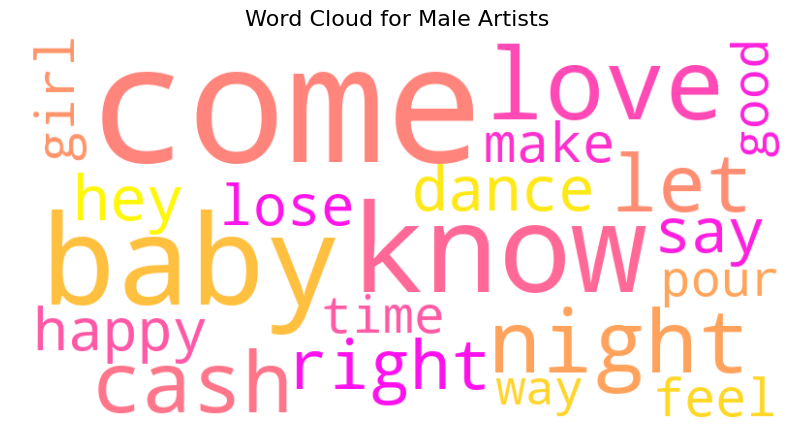

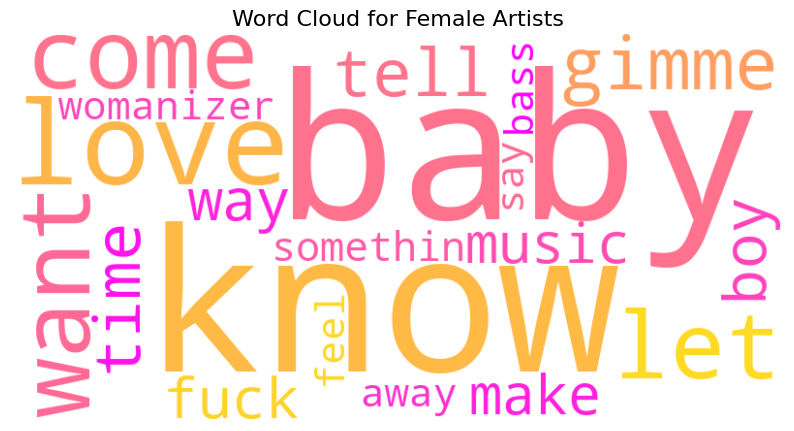

In [21]:
def plot_word_cloud(word_freq, title="Word Cloud"):
    # Create a dictionary with words and their corresponding frequencies
    word_dict = dict(word_freq)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='spring_r').generate_from_frequencies(word_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(title, fontsize=16)
    plt.show()

# Plot the word cloud for male and female artists
plot_word_cloud(male_word_freq, title="Word Cloud for Male Artists")
plot_word_cloud(female_word_freq, title="Word Cloud for Female Artists")

In [26]:
db_path = '../data/spotify_data.db'
conn = sqlite3.connect(db_path)

# Query the database to retrieve lyrics and gender
query = "SELECT lyrics, gender FROM top_tracks WHERE lyrics IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [30]:
def compute_word_frequencies(df, gender_value):
    gender_df = df[df['gender'] == gender_value]
    all_words = gender_df['lyrics'].dropna().apply(preprocess_lyrics).sum()
    word_freq = pd.Series(all_words).value_counts().to_dict()
    return word_freq

# Compute word frequencies for male and female artists
male_word_freq = compute_word_frequencies(df, gender_value=0)  # Assuming 0 = male
female_word_freq = compute_word_frequencies(df, gender_value=1)  # Assuming 1 = female

# Plotting function for word cloud with mask
def plot_shaped_word_cloud(word_freq, mask_path, title="Word Cloud"):
    # Create a dictionary with words and their corresponding frequencies
    word_dict = dict(word_freq)
    
    # Load the mask image
    mask = np.array(Image.open(mask_path))
    
    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', mask=mask,
                   stopwords=STOPWORDS, contour_width=1, contour_color='steelblue',
                   colormap='spring_r').generate_from_frequencies(word_dict)
    
    # Create coloring from the image
    image_colors = ImageColorGenerator(mask)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    
    # Set the title without multiline issues
    plt.text(0.5, -0.1, title, fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.show()

# Generate and plot word clouds for male and female artists
male_mask_path = "../images/justin_2.png"  # Replace with your mask file path
female_mask_path = "../images/taylor_2.png"  # Replace with your mask file path

plot_shaped_word_cloud(male_word_freq, mask_path=male_mask_path, title="Word Cloud for Male Artists")
plot_shaped_word_cloud(female_word_freq, mask_path=female_mask_path, title="Word Cloud for Female Artists")

ValueError: anchor not supported for multiline text